In [1]:
#------------------Parte A-------------------#

In [2]:
#Ejercicio 1
     
import requests

#busamos algun ítem de interés: Iphone 14 pro max 
buscar = "iphone 14 pro max"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))
response = requests.request("GET", url)
print(response) #Correcto 

#Chequeamos que el url sea el correcto
url

#Guardamos el resultado en un diccionario (json)
data = response.json()
#data                           #para ver su contenido

<Response [200]>


In [3]:
#Ejercicio 2

#Cantidad de Resultados que obtenemos
print('Longitud de lista de resultados:', len(data['results']))

# Veamos el precio del primer resultado de la búsqueda
print('Precio del primer resultado:', data['results'][0]['price'])


import pandas as pd

precios = []

#Veamos el precio de todos los resultados 

for i, resultado in enumerate(data['results']): 
    #print(f'Precio del resultado {i}:', resultado['price'])
    precios.append(resultado['price'])

df_precios = pd.DataFrame(precios, columns=['Precio'])

# Mostramos el DataFrame
print(df_precios)


#precio promedio:
print('Precio promedio:', df_precios['Precio'].mean())   #1845031.74

#precio máximo:
print('Precio máximo:',df_precios['Precio'].max())    #5999999

#precio minimo:
print('Precio minimo:',df_precios['Precio'].min())    #145000


Longitud de lista de resultados: 50
Precio del primer resultado: 1720000
     Precio
0   1720000
1   1720000
2   1950000
3   3000000
4   2320000
5   1890000
6   1891000
7   1890000
8   3399999
9   3399999
10  5999999
11  1250000
12  1690000
13  1899999
14  1400000
15  1800000
16  1400000
17  1915200
18  1650000
19  1915200
20  1971200
21  1429991
22  1915200
23  1728600
24  1971200
25  1915200
26  1825600
27  1948800
28  1915200
29  1825600
30  1948800
31  1799000
32  1550000
33  1300000
34  1350000
35   145000
36  1300000
37  1500000
38  1500000
39  1400000
40   480000
41  2300000
42  1550000
43  1170000
44  1900000
45  1750000
46  1649000
47  1300000
48  1500000
49  1600000
Precio promedio: 1830795.74
Precio máximo: 5999999
Precio minimo: 145000


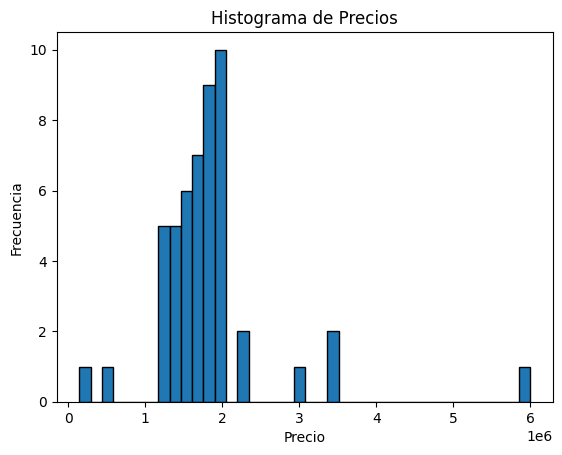

In [11]:
#Ejercicio 3

import matplotlib.pyplot as plt
import numpy as np

#para poder visualizarlo 
%matplotlib inline

plt.hist(df_precios['Precio'], bins=40, edgecolor='black')  
plt.title('Histograma de Precios')
plt.xlabel('Precio')        # muestra los precios multiplicados por 1 millón
plt.ylabel('Frecuencia')
plt.show()

#A simple vista hay 5 outliers; 2 items muy baratos y 3 items demasiado caros. El precio de la mayoria de los items ronda entre 1 y 2 millones de pesos. 

In [ ]:
#Ejercicio 4

In [ ]:
#------------------Parte B-------------------#

In [ ]:
#Ejercicio 5